# Reto Extracción de texto

#### **Author:** David Camilo Cortes Salazar

### Dependencias

In [82]:
import docx2pdf #docx to pdf
import pdfplumber #pdf reader
import pytesseract #OCR
from PIL import Image #image reader
from PIL.ExifTags import TAGS #image metadata aux

from unicodedata import normalize #Normalize char
import re #regex

from gensim import corpora #Tokenizer
from collections import defaultdict #Best dicts

import matplotlib.pyplot as plt #Graphic ploter
from wordcloud import WordCloud #BOG image

from pprint import pprint #print aux

## PNG
Realizar extracción de texto líquido a partir de una imagen en formato PNG. Haga uso de un paquete en Python que implemente OCR (Optical Character Recognition). Buscar y aplicar a 5 imágenes que hablen de programación SQL en español.

### Imagenes
Presentación en pantalla de la imagen (escala de 200x200 pixeles)

<img src="docs/png/i1.png"
     alt="Image 1"
     width="200" 
     height="200"
      />
<img src="docs/png/i2.png"
     alt="Image 2"
     width="200" 
     height="200"
      />
<img src="docs/png/i3.png"
     alt="Image 3"
     width="200" 
     height="200"
      />
<img src="docs/png/i4.png"
     alt="Image 4"
     width="200" 
     height="200"
      />
<img src="docs/png/i5.png"
     alt="Image 5"
     width="200" 
     height="200"
      />

### Extraccion de caracteres
Muestra texto extraído de la imagen (primeros 250 caracteres)

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
#Rutas
files = ['docs/png/i1.png','docs/png/i2.png','docs/png/i3.png','docs/png/i4.png','docs/png/i5.png',]

png_chars = []

for file in files:
    
    #Abrir png
    im = Image.open(file)
    
    #Extraemos texto
    text = pytesseract.image_to_string(im)
    
    png_chars.append(text[:250])
    print(f'#####\n{file[9:]}:\n {text[:250]}\n')



#####
i1.png:
 ~Qué es SQL?

e SQL
- Structured Query Language
- Lenguaje de consulta estructurado
- “Ordenes” SQL

e Lenguaje de acceso a bases de datos relacionales

e Es un estandar para sistemas de gestién de bases de
datos relacionales
- Oracle, Sybase, Micros

#####
i2.png:
 Lenguaje SQL

>Que es SQL ???

eEs un Lenguaje estandard de alto nivel
con el cual los DBMS interactuan con las
aplicaciones del usuario.

eSu nombre es la cicla de “Structured
Query Language”, que _ traducido al
espafiol significa : Lenguaje de Cons

#####
i3.png:
 La instancia administrada de Azure SQL Database
es la solucion PaaS de soporte y rendimiento

Asesor inteligente y conocimientos inteligentes basados en machine learning,
asi como recomendaciones basadas en un analisis de la raiz del problema

Ajuste

#####
i4.png:
 fu Microsoft prodware™

Descubre los beneficios de la modernizaci6n y
El avelae-Maeli me Mlacit-laletmelelallaeieeclerme(-w-V40la-)

SQL Database
Moderniza tus cargas de trabajo de SQL

### Metadata
Muestra la metadata del archivo PNG: titulo, autor, formato, fecha de creación, fecha de modificación

In [4]:
#Rutas
files = ['docs/png/i1.png','docs/png/i2.png','docs/png/i3.png','docs/png/i4.png','docs/png/i5.png',]

for file in files:
    exif = {}
    image = Image.open(file)
    
    for tag, value in image.getexif().items():
        if tag in TAGS:
            exif[TAGS[tag]] = value
    
    print(f'#####\n{file[9:]}:')
    pprint(exif)

    

#####
i1.png:
{'DocumentName': 'Â¿QuÃ© es SQL? SQL Lenguaje de acceso a bases de datos '
                 'relacionales',
 'ImageDescription': 'Structured Query Language. Lenguaje de consulta '
                     'estructurado. Ã\x93rdenes SQL. Lenguaje de acceso a '
                     'bases de datos relacionales. Es un estÃ¡ndar para '
                     'sistemas de gestiÃ³n de bases de datos relacionales. '
                     'Oracle, Sybase, Microsoft SQL Server, Access, Ingres, '
                     'â\x80¦ Extensiones propietarias SQL.',
 'ResolutionUnit': 3,
 'Software': 'SlidePlayer',
 'XResolution': 37.0,
 'YCbCrPositioning': 1,
 'YResolution': 37.0}
#####
i2.png:
{'DocumentName': 'Lenguaje SQL Que es SQL Es un Lenguaje estandard de alto '
                 'nivel con el cual los DBMS interactuan con las aplicaciones '
                 'del usuario.',
 'ImageDescription': 'Su nombre es la cicla de Structured Query Language , que '
                     'traducido al es

## PDF
Realizar extracción de texto desde un archivo en formato PDF. Haga uso de un paquete en Python que implemente lectura y extracción de datos desde un PDF. Buscar y aplicar a 5 documentos que hablen de programación SQL en español.

### Extraccion de caracteres
Muestra texto extraído del documento PDF (primeros 250 caracteres)

In [5]:
#Rutas
files = ['docs/pdf/p1.pdf','docs/pdf/p2.pdf','docs/pdf/p3.pdf','docs/pdf/p4.pdf','docs/pdf/p5.pdf']

pdf_chars = []
extr_text = ''

for file in files:
    
    #Abrir pdf
    pdf = pdfplumber.open(file)

    num_page = 0

    extr_text = ''
    
    for page in pdf.pages:
        
        #Extraer texto
        raw_page = page.extract_text()

        #Seleccionar caracteres
        for char in raw_page:
            extr_text += char
        
        #Seleccionar exactamenbte 250 caracteres
        if len(extr_text) >= 250:
            extr_text = extr_text[0:250]
            break

        num_page += 1
        
    pdf_chars.append(extr_text)
    print(f'#####\n{file[9:]}:\n {extr_text}\n')

#####
p1.pdf:
 2.5.- El lenguaje estándar SQL
• El SQL es un lenguaje estándar de definición y manipulación (y consulta) de 
bases de datos relacionales.
• El SQL estándar incluye:
• Características del Álgebra Relacional.
• Características del Cálculo Relacional d

#####
p2.pdf:
 SQL SERVER VS MySQL
Autores: Jose Santamaría y Javier Hernández
Microsoft SQL Server
Microsoft SQL Server es un sistema de gestión de base de datos relacional (RDBMS) 
producido por Microsoft. Su principal lenguaje de consulta es Transact-SQL, una 
a

#####
p3.pdf:
 Consultas SQL (SELECT) 
Consultas sencillas 
Devolver todos los campos de una tabla (SELECT *) 
 
SELECT *  
FROM CLIENTES 
Con el * indicamos que queremos devolver todos los campos. Si CLIENTES dispone de los 
campos idCliente, nombre y descripcion,

#####
p4.pdf:
 Bases de datos  MTIG 
Práctica 3.   Consultas SQL 
1. Enunciado 
En este ejercicio se realizarán consultas SQL que respondan a las preguntas que se 
plantearán sin utilizar QBE. Dada u

### Metadata
Muestra la metadata del archivo PDF: titulo, autor, formato, fecha de creación, fecha de modificación

In [6]:
#Rutas
files = ['docs/pdf/p1.pdf','docs/pdf/p2.pdf','docs/pdf/p3.pdf','docs/pdf/p4.pdf','docs/pdf/p5.pdf']

for file in files:
    
    #Abrir pdf
    pdf = pdfplumber.open(file)
    
    #Obtener info
    print(f'#####\n{file[9:]}:')
    pprint(pdf.metadata)


#####
p1.pdf:
{'Author': 'jorallo',
 'CreationDate': 'D:20030206175659',
 'Creator': 'Microsoft PowerPoint - [Tema2a.ppt]',
 'Producer': 'Acrobat PDFWriter 5.0 para Windows NT',
 'Title': 'Tema2a.ppt'}
#####
p2.pdf:
{'Author': 'BICHO-HP',
 'CreationDate': "D:20080208202106+01'00'",
 'Creator': 'Writer',
 'Producer': 'OpenOffice.org 2.3',
 'Title': 'Microsoft SQL Server'}
#####
p3.pdf:
{'Author': 'Muevo',
 'CreationDate': "D:20131128103846+01'00'",
 'Creator': 'Microsoft® Word 2010',
 'ModDate': "D:20131128103846+01'00'",
 'Producer': 'Microsoft® Word 2010'}
#####
p4.pdf:
{'Author': 'fernan',
 'CreationDate': "D:20110120124446+01'00'",
 'Creator': 'PScript5.dll Version 5.2.2',
 'ModDate': "D:20110120124446+01'00'",
 'Producer': 'Acrobat Distiller 7.0.5 (Windows)',
 'Title': 'Microsoft Word - Práct. 3. SQL.doc'}
#####
p5.pdf:
{'Author': 'David Sarmiento',
 'CreationDate': 'D:20120307114602',
 'Creator': 'Microsoft® Office Word 2007',
 'ModDate': 'D:20120307114602',
 'Producer': 'Microsof

## DOCX
Realizar extracción de texto desde un archivo en formato DOCX. Haga uso de un paquete en Python que implemente conversión DOCX a PDF. Buscar y aplicar a 5 documentos que hablen de programación SQL en español.

### Docx a Pdf
Conversión documento DOCX a PDF y almacenarlo localmente

In [7]:
#Rutas
files = ['docs/docx/d1.docx','docs/docx/d2.docx','docs/docx/d3.docx','docs/docx/d4.docx','docs/docx/d5.docx']

#Conversion y guardado
for file in files:
  docx2pdf.convert(file, 'docs/pdf/' + file[10:-4] + 'pdf')

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.15s/it]


### Extraccion de caracteres
Muestra texto extraído del documento PDF (primeros 250 caracteres)

In [8]:
#Rutas
files = ['docs/pdf/d1.pdf','docs/pdf/d2.pdf','docs/pdf/d3.pdf','docs/pdf/d4.pdf','docs/pdf/d5.pdf']

docx_chars = []
extr_text = ''

for file in files:
    
    #Abrir pdf
    pdf = pdfplumber.open(file)

    num_page = 0

    extr_text = ''
    
    for page in pdf.pages:
        
        #Extraer texto
        raw_page = page.extract_text()

        #Seleccionar caracteres
        for char in raw_page:
            extr_text += char
        
        #Seleccionar exactamenbte 250 caracteres
        if len(extr_text) >= 250:
            extr_text = extr_text[0:250]
            break

        num_page += 1
    
    docx_chars.append(extr_text)
    print(f'#####\n{file[9:]}: {extr_text}\n')

#####
d1.pdf:  
Proceso de configuración de SQL Server Express 
 
ATENCIÓN: SEGUIR PASO POR PASO SIN SALTEARSE NI OMITIR 
NINGUNA ETAPA 
 
Chequeo previo instalación 
1.  Chequear que el usuario de Windows de la  computadora del cliente tenga permisos de Administr

#####
d2.pdf:      
 
 
Regulador de recursos de SQL Server 2012 
 
Artículo técnico de SQL Server 
 
Autor: Guy Bowerman 
Revisores técnicos: Jim van de Erve, Lindsey Allen (ZHU), Madhan Arumugam 
Ramakrishnan, Xin Jin 
 
Fecha de publicación: julio de 2012 
Se a

#####
d3.pdf: SQL Server DBA job profile 
SQL Server Database Administrators are responsible for the implementation, configuration, 
maintenance, and performance of critical SQL Server RDBMS systems. Their main goal is to ensure 
the availability and consistent pe

#####
d4.pdf: SQL Server Managed Services Monitor Deliverables  7/2012   
 
Service Overview 
The scope of this engagement is to deliver a SQL Server managed service, monitoring SQL Servers’ 
operationa

### Metadata
Muestra la metadata del archivo PDF: titulo, autor, formato, fecha de creación, fecha de modificación

In [9]:
#Rutas
files = ['docs/pdf/d1.pdf','docs/pdf/d2.pdf','docs/pdf/d3.pdf','docs/pdf/d4.pdf','docs/pdf/d5.pdf']

for file in files:
    
    #Abrir pdf
    pdf = pdfplumber.open(file)
    
    #Obtener info
    #Obtener info
    print(f'#####\n{file[9:]}:')
    pprint(pdf.metadata)



#####
d1.pdf:
{'Author': 'nicolas',
 'CreationDate': "D:20220428200733-05'00'",
 'Creator': 'Microsoft® Word para Microsoft 365',
 'ModDate': "D:20220428200733-05'00'",
 'Producer': 'Microsoft® Word para Microsoft 365',
 'Title': 'Proceso de configuración de SQL Server Express'}
#####
d2.pdf:
{'Author': 'Beth Inghram (Linda Werner & Associates Inc)',
 'CreationDate': "D:20220428200739-05'00'",
 'Creator': 'Microsoft® Word para Microsoft 365',
 'ModDate': "D:20220428200739-05'00'",
 'Producer': 'Microsoft® Word para Microsoft 365',
 'Title': 'Resource Governor in SQL Server 2012'}
#####
d3.pdf:
{'Author': 'Andrea Kimbrell',
 'CreationDate': "D:20220428200743-05'00'",
 'Creator': 'Microsoft® Word para Microsoft 365',
 'ModDate': "D:20220428200743-05'00'",
 'Producer': 'Microsoft® Word para Microsoft 365'}
#####
d4.pdf:
{'Author': 'Josh B. Thomas',
 'CreationDate': "D:20220428200747-05'00'",
 'Creator': 'Microsoft® Word para Microsoft 365',
 'ModDate': "D:20220428200747-05'00'",
 'Produce

## Limpieza y BOW
1. Realizar un proceso de limpieza básica del texto para normalizarlo y estandarizarlo. Aplique funciones de transformación de texto con expresiones regulares en caso de ser necesario. Aplicar a las extracciones realizadas de forma individual
2. Realizar un conteo de frecuencia de las palabras y mostrar un BOW (Bag of Words) con el top de 100 palabras más frecuentes. Utilice un paquete que presente el top en formato imagen. Combinar todas las extracciones realizadas.

In [45]:
png_raw = png_chars.copy()
pdf_raw = pdf_chars.copy()
docx_raw = docx_chars.copy()

### Normalización

Texto con todos los acentos y tildes eliminados

In [49]:
#PNG data
for i in range(len(png_raw)):
    
    #Remplaza cada caracter por su forma normal aplicando " compatibility decomposition" (NFKD)
    png_raw[i] = normalize("NFKD", png_raw[i]).encode("ascii","ignore").decode("ascii")

#PDF data
for i in range(len(pdf_raw)):
    
    #Remplaza cada caracter por su forma normal aplicando " compatibility decomposition" (NFKD)
    pdf_raw[i] = normalize("NFKD", pdf_raw[i]).encode("ascii","ignore").decode("ascii")

#DOCX data
for i in range(len(docx_raw)):
    
    #Remplaza cada caracter por su forma normal aplicando " compatibility decomposition" (NFKD)
    docx_raw[i] = normalize("NFKD", docx_raw[i]).encode("ascii","ignore").decode("ascii")

Texto sin los signos de puntuación y caracteres especiales

In [50]:
#PNG data
for i in range(len(png_raw)):
    
    data = png_raw[i]
    data = re.sub(r'[^a-zA-Z\s]', "", data) #Elimina carateres eseciales
    data = re.sub(r'[\n]', " ", data) #Elimina salto en linea
    data = re.sub(r'[\s]{2,}', " ", data) #Elimina espacios seguidos
    
    png_raw[i] = data

#PDF data
for i in range(len(pdf_raw)):
    
    data = pdf_raw[i]
    data = re.sub(r'[^a-zA-Z\s]', "", data) #Elimina carateres eseciales
    data = re.sub(r'[\n]', " ", data) #Elimina salto en linea
    data = re.sub(r'[\s]{2,}', " ", data) #Elimina espacios seguidos
    
    pdf_raw[i] = data

#DOCX data
for i in range(len(docx_raw)):
    
    data = docx_raw[i]
    data = re.sub(r'[^a-zA-Z\s]', "", data) #Elimina carateres eseciales
    data = re.sub(r'[\n]', " ", data) #Elimina salto en linea
    data = re.sub(r'[\s]{2,}', " ", data) #Elimina espacios seguidos
    
    docx_raw[i] = data

Texto en minúsculas

In [51]:
#PNG data
for i in range(len(png_raw)):
    png_raw[i] = png_raw[i].lower()
    
#PDF data
for i in range(len(pdf_raw)):
    pdf_raw[i] = pdf_raw[i].lower()

#DOCX data
for i in range(len(docx_raw)):
    docx_raw[i] = docx_raw[i].lower()

Muestra de los datos crudos y limpios para compararlos

In [52]:
print(f'PNG:\n{png_raw}\n')
print(f'PDF:\n{pdf_raw}\n')
print(f'DOCX:\n{docx_raw}\n')

PNG:
['que es sql e sql structured query language lenguaje de consulta estructurado ordenes sql e lenguaje de acceso a bases de datos relacionales e es un estandar para sistemas de gestien de bases de datos relacionales oracle sybase micros', 'lenguaje sql que es sql ees un lenguaje estandard de alto nivel con el cual los dbms interactuan con las aplicaciones del usuario esu nombre es la cicla de structured query language que traducido al espafiol significa lenguaje de cons', 'la instancia administrada de azure sql database es la solucion paas de soporte y rendimiento asesor inteligente y conocimientos inteligentes basados en machine learning asi como recomendaciones basadas en un analisis de la raiz del problema ajuste', 'fu microsoft prodwaretm descubre los beneficios de la modernizacin y el avelaemaeli me mlacitlaletmelelallaeieeclermewvla sql database moderniza tus cargas de trabajo de sql server y r trasladandolas al cloud que mejor conoce sq', 'sql server developer edition selecc

### Extraccion Palabras

In [81]:
png_words, pdf_words, docx_words = [], [], []

#Lista de palabras que no nos interesan
stoplist = ['a', 'e', 'r', 'un', 'una', 'uno', 'con', 'el', 'la', 'las', 'los', 'de', 'del', 'es', 'era', 'y', 'para', 'que', 'cual', 'al', 'en']

#Creacion de un corpus procesado
for document in png_raw:
    text = [word for word in document.split() if word not in stoplist]
    png_words.append(text)

for document in pdf_raw:
    text = [word for word in document.split() if word not in stoplist]
    pdf_words.append(text)

for document in docx_raw:
    text = [word for word in document.split() if word not in stoplist]
    docx_words.append(text)

### Frecuencia
Diccionario con cada palabra y su frecuencia

In [80]:
frequency = defaultdict(int)

for words in png_words:
    for word in words:
        if len(word) > 2:
            frecuency[word] += 1

for words in pdf_words:
    for word in words:
        if len(word) > 2:
            frecuency[word] += 1

for words in docx_words:
    for word in words:
        if len(word) > 2:
            frecuency[word] += 1

print(frecuency)

{'que': 8, 'sql': 124, 'structured': 8, 'query': 8, 'language': 8, 'lenguaje': 32, 'consulta': 12, 'estructurado': 4, 'ordenes': 4, 'acceso': 4, 'bases': 16, 'datos': 28, 'relacionales': 12, 'estandar': 16, 'para': 2, 'sistemas': 4, 'gestien': 4, 'oracle': 4, 'sybase': 4, 'micros': 4, 'ees': 4, 'estandard': 4, 'alto': 4, 'nivel': 4, 'con': 4, 'cual': 1, 'los': 5, 'dbms': 4, 'interactuan': 4, 'las': 3, 'aplicaciones': 4, 'del': 5, 'usuario': 8, 'esu': 4, 'nombre': 8, 'cicla': 4, 'traducido': 4, 'espafiol': 4, 'significa': 4, 'cons': 4, 'instancia': 4, 'administrada': 4, 'azure': 4, 'database': 12, 'solucion': 4, 'paas': 4, 'soporte': 4, 'rendimiento': 4, 'asesor': 4, 'inteligente': 4, 'conocimientos': 4, 'inteligentes': 4, 'basados': 4, 'machine': 4, 'learning': 4, 'asi': 4, 'como': 4, 'recomendaciones': 4, 'basadas': 4, 'analisis': 4, 'raiz': 4, 'problema': 4, 'ajuste': 4, 'microsoft': 16, 'prodwaretm': 4, 'descubre': 4, 'beneficios': 4, 'modernizacin': 4, 'avelaemaeli': 4, 'mlacitlale

### Tokenización
Nuevo campo con vectores de palabras (tokenización)

#### PNG vectores

In [93]:
png_dict = corpora.Dictionary(png_words)
#print(png_dict.token2id) -> tokens

#Convertimos palabras en vectores
png_vect = []
for word in png_words:
    png_vect.append(png_dict.doc2bow(word))

print(png_vect)

[[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 3), (16, 1), (17, 1)], [(7, 1), (8, 3), (12, 1), (15, 2), (16, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(15, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)], [(15, 2), (43, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)], [(3, 1), (15, 2), (70, 2), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 2)]]


#### PDF vectores

In [94]:
pdf_dict = corpora.Dictionary(pdf_words)
#print(pdf_dict.token2id) -> Tokens

#Convertimos palabras en vectores
pdf_vect = []
for word in pdf_words:
    pdf_vect.append(pdf_dict.doc2bow(word))

print(pdf_vect)

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 2), (11, 1), (12, 2), (13, 1), (14, 3)], [(4, 1), (6, 1), (10, 1), (12, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 3), (29, 1), (30, 1), (31, 1), (32, 1)], [(14, 1), (33, 3), (34, 2), (35, 2), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 3), (45, 1), (46, 1), (47, 1), (48, 2)], [(1, 1), (6, 2), (14, 2), (16, 1), (23, 1), (35, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1)], [(14, 1), (28, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1)]]


#### DOCX vectores

In [95]:
docx_dict = corpora.Dictionary(docx_words)
#print(docx_dict.token2id) -> Tokens

#Convertimos palabras en vectores
docx_vect = []
for word in docx_words:
    docx_vect.append(docx_dict.doc2bow(word))

print(docx_vect)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(20, 2), (22, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)], [(20, 3), (22, 3), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1)], [(20, 2), (22, 3), (63, 1), (67, 1), (74, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1)], [(20, 2), (22, 2), (53, 4), (67, 1), (

### Imagen
Imagen con top 100 palabras más frecuentes 

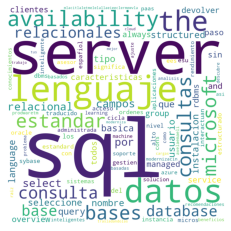

In [85]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(frecuency)
plt.axis('off')
plt.imshow(wc)
plt.savefig('docs/bow/top100.png', dpi=199)